In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data into a dataframe
file_path = "AssignmentData.xlsx"
sheet_name = "WorkerFunnel"
funnel = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
# Display basic information about the dataframe
print("Shape of the dataframe:", funnel.shape)
print("\nColumn names:\n", funnel.columns)
print("\nData types:\n", funnel.dtypes)
print("\nFirst few rows of the dataframe:\n", funnel.head())

Shape of the dataframe: (1197, 7)

Column names:
 Index(['Date', 'Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity'],
      dtype='object')

Data types:
 Date                      object
Quarter                   object
Department                object
Targeted Productivity    float64
Overtime                   int64
No. of Workers           float64
Actual Productivity      float64
dtype: object

First few rows of the dataframe:
                   Date Quarter Department  Targeted Productivity  Overtime   
0  2015-01-01 00:00:00      Q1     Sewing                   0.80      7080  \
1  2015-01-01 00:00:00      Q1  Finishing                   0.75       960   
2  2015-01-01 00:00:00      Q1     Sewing                   0.80      3660   
3  2015-01-01 00:00:00      Q1     Sewing                   0.80      3660   
4  2015-01-01 00:00:00      Q1     Sewing                   0.80      1920   

   No. of Workers  Actual Productivity 

In [4]:
#Summary statistics
funnel.describe()

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1197.000000,1197.000000,1197.000000,1167.000000
mean,0.729632,4567.460317,34.609858,0.734882
std,0.097891,3348.823563,22.197687,0.174629
min,0.070000,0.000000,2.000000,0.233705
25%,0.700000,1440.000000,9.000000,0.650272
50%,0.750000,3960.000000,34.000000,0.773333
75%,0.800000,6960.000000,57.000000,0.850176
max,0.800000,25920.000000,89.000000,1.120437


In [5]:
# Check for missing values
missing_values = funnel.isnull().sum()
print("\nMissing values:\n", missing_values)


Missing values:
 Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64


In [6]:
# Identify duplicate rows
duplicate_rows = funnel.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicate_rows)

# Remove duplicate rows
funnel_no_duplicates = funnel.drop_duplicates()

# Check the shape of the dataframe after removing duplicates
print("Shape of the dataframe after removing duplicates:", funnel_no_duplicates.shape)


Number of duplicate rows: 36
Shape of the dataframe after removing duplicates: (1161, 7)


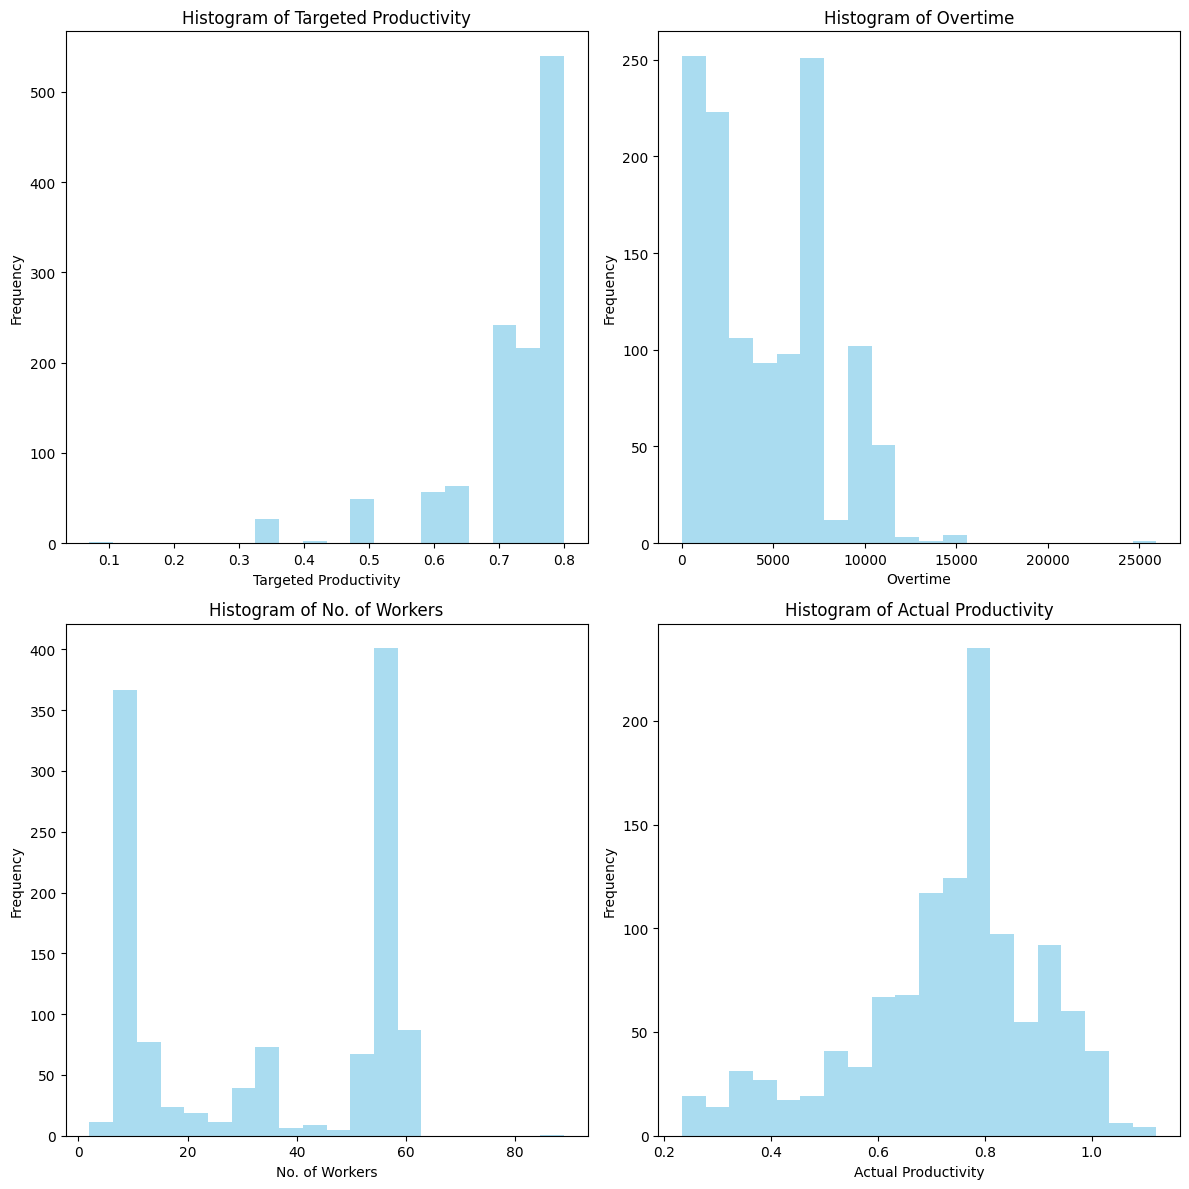

In [7]:
# # Visualizations
# Histogram of a numeric variable tp check the distribution of the numeric data


# Select only numeric columns for histogram visualization
numeric_columns = funnel.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for histograms
fig, axes = plt.subplots(nrows=len(numeric_columns) // 2, ncols=2, figsize=(12, 12))
axes = axes.flatten()  

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(funnel[column], bins=20, color='skyblue', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [8]:
# Fill missing values with the median of the column
median_value = funnel['Actual Productivity'].median()
funnel['Actual Productivity'].fillna(median_value, inplace=True)

funnel.isnull().sum()

Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

### A short paragraph discribing the strategy I am using: 
I first loaded the data, then looked for it's statistics, followed by reviewing the missing values and then dropping the duplicate values. Then the distribution of data is inspected inorder to replace the missing values. The missing value column named "Actual Productivity" has a left skewed distribution so the missing values are then replaced by the median value of the same column.

In [9]:
# Define a function to determine if target is achieved
def target_achieved(row):
    if row['Actual Productivity'] > row['Targeted Productivity']:
        return 'Yes'
    else:
        return 'No'

# Apply the function to create the new column
funnel['Target Achieved'] = funnel.apply(target_achieved, axis=1)

# Display the dataframe with the new column
# funnel.tail(20)

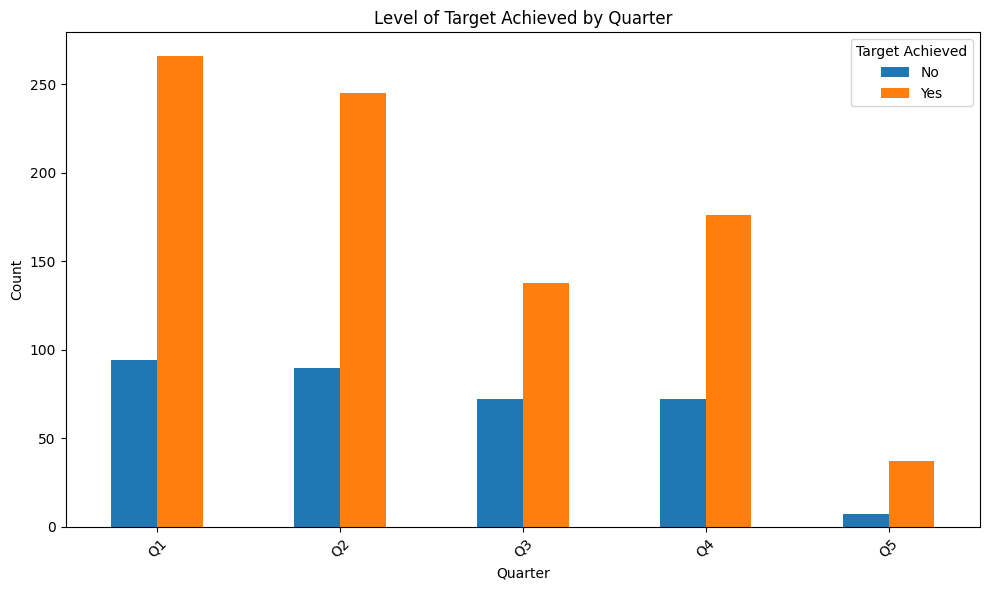

In [10]:
# Convert the 'Date' column to datetime format
funnel['Date'] = pd.to_datetime(funnel['Date'])

# Group the data by quarter and 'Target Achieved', and calculate counts
grouped_data = funnel.groupby(['Quarter', 'Target Achieved']).size().unstack(fill_value=0)

# Plot the grouped bar graphs
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels and title
plt.title('Level of Target Achieved by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target Achieved', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
!pip install statsmodels

^C
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/6d/c8/46d355b3c2d04881ce745c667eba6b08ea2215a1ccae875c64b725c3d348/statsmodels-0.14.1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 262.6 kB/s eta 0:00:38
   ---------------------------------------- 0.0/9.8 MB 262.6 kB/s eta 0:00:38
   ---------------------------------------- 0.0/9.8 MB 178.6 kB/s eta 0:00:55
   ---------------------------------------- 0.0/9.8 MB 178.6 kB/s eta 0:00:55
   ---------------------------------------- 0.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\ABHAY\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ABHAY\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


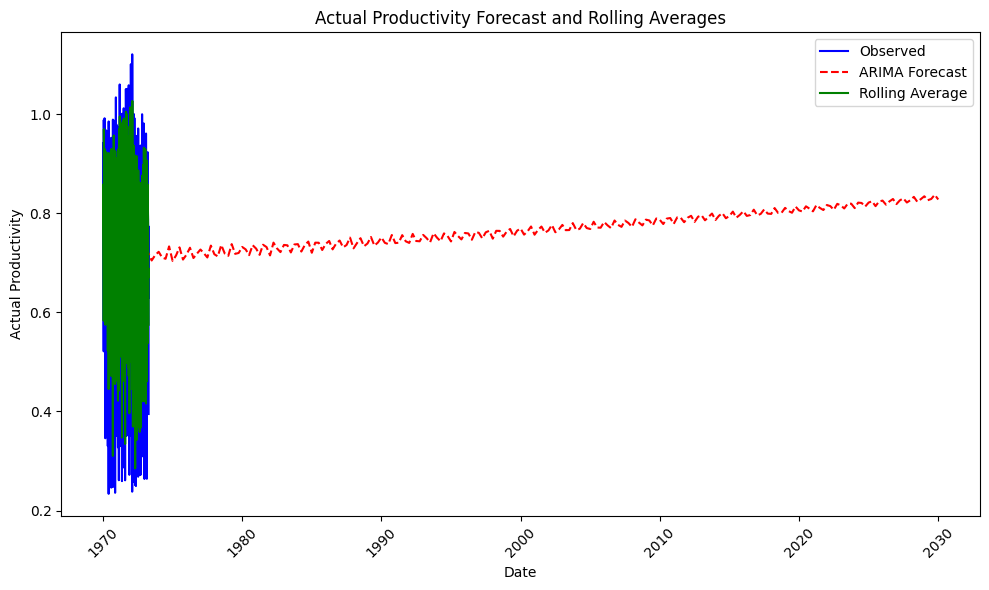

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Convert the 'Date' column to datetime format
# funnel['Date'] = pd.to_datetime(funnel['Date'])

# # Set 'Date' column as the index
# funnel.set_index('Date', inplace=True)

# Prepare the dataset for time series analysis
actual_productivity = funnel['Actual Productivity']

# Split the dataset into training and testing sets
train_size = int(len(actual_productivity) * 0.8)
train, test = actual_productivity[:train_size], actual_productivity[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(5,3,10)) # Example ARIMA parameters, you can adjust them
model_fit = model.fit()

# Make forecasts for the next four quarters
forecast_values_arima = model_fit.forecast(steps=len(test))

# Compute rolling averages for the Actual Productivity
rolling_average = actual_productivity.rolling(window=4).mean()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot observed values
plt.plot(actual_productivity.index, actual_productivity, label='Observed', color='blue')

# Plot ARIMA forecasts
forecast_index = pd.date_range(start=actual_productivity.index[-1], periods=240, freq='Q')
plt.plot(forecast_index, forecast_values_arima, label='ARIMA Forecast', color='red', linestyle='--')

# Plot rolling averages
plt.plot(actual_productivity.index, rolling_average, label='Rolling Average', color='green')

# Add labels and title
plt.title('Actual Productivity Forecast and Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Calculate MAPE for ARIMA model
mape_arima = mean_absolute_percentage_error(test, forecast_values_arima)

# Calculate MSE for ARIMA model
mse_arima = mean_squared_error(test, forecast_values_arima)

# Calculate MAPE for Rolling Averages
mape_rolling_avg = mean_absolute_percentage_error(test, rolling_average[-len(test):])

# Calculate MSE for Rolling Averages
mse_rolling_avg = mean_squared_error(test, rolling_average[-len(test):])

# Summary comparison
summary_comparison = pd.DataFrame({
    'Model': ['ARIMA', 'Rolling Averages'],
    'MAPE': [mape_arima, mape_rolling_avg],
    'MSE': [mse_arima, mse_rolling_avg]
})

# Display the summary comparison
print("Summary Comparison with Evaluation Criteria:")
print(summary_comparison)


Summary Comparison with Evaluation Criteria:
              Model      MAPE       MSE
0             ARIMA  0.242814  0.029293
1  Rolling Averages  0.109041  0.013359


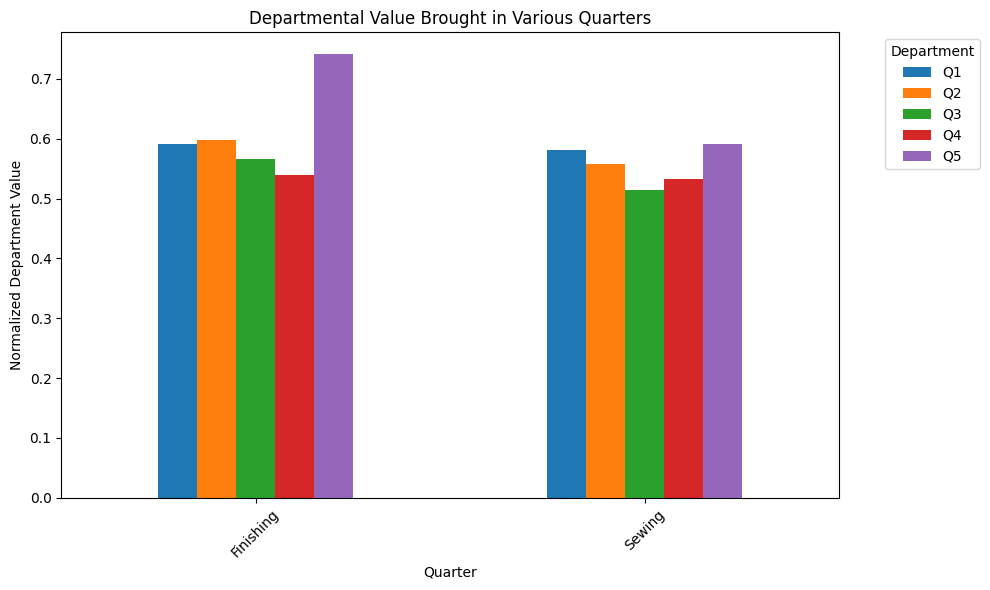

In [16]:
# Calculate Department Value
funnel['Department Value'] = funnel['Actual Productivity'] / (8.4 * 10**5 / 2)

# Normalize Department Value to lie in the range of 0-1
min_val = funnel['Department Value'].min()
max_val = funnel['Department Value'].max()
funnel['Normalized Department Value'] = (funnel['Department Value'] - min_val) / (max_val - min_val)

# Group by Department and Quarter
grouped_data = funnel.groupby(['Department', 'Quarter'])['Normalized Department Value'].mean().unstack()

# Plot the departmental value brought in various quarters
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Departmental Value Brought in Various Quarters')
plt.xlabel('Quarter')
plt.ylabel('Normalized Department Value')
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
# Calculate mean departmental value for each department
mean_department_value = funnel.groupby('Department')['Normalized Department Value'].mean()

# Allocate resources based on mean departmental value
allocation_strategy = mean_department_value / mean_department_value.sum()

# Display allocation strategy
print("Allocation Strategy:")
print(allocation_strategy)


Allocation Strategy:
Department
Finishing    0.513835
Sewing       0.486165
Name: Normalized Department Value, dtype: float64


In [14]:
# !pip install python-pptx

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from pptx import Presentation
from pptx.util import Inches

# Create a PowerPoint presentation object
presentation = Presentation()

# Slide 1: Departmental Value Brought in Various Quarters
slide_1 = presentation.slides.add_slide(presentation.slide_layouts[5])
title = slide_1.shapes.title
title.text = "Departmental Value Brought in Various Quarters"

# Add the plot as an image to the slide
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.xticks(rotation=45)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("departmental_value.png")
plt.close()

img_path = "departmental_value.png"
left = Inches(1)
top = Inches(1.5)
slide_1.shapes.add_picture(img_path, left, top, width=Inches(8))

# Slide 2: Allocation Strategy
slide_2 = presentation.slides.add_slide(presentation.slide_layouts[5])
title = slide_2.shapes.title
title.text = "Allocation Strategy"

# Add the allocation strategy as text to the slide
allocation_text = "\n".join([f"{department}: {allocation:.2%}" for department, allocation in allocation_strategy.items()])

# Add a text box to the slide and set the allocation text
left = Inches(1)
top = Inches(1.5)
width = Inches(8)
height = Inches(5)
text_box = slide_2.shapes.add_textbox(left, top, width, height)
text_frame = text_box.text_frame
text_frame.text = allocation_text

# Save the presentation
presentation.save("presentation.pptx")

<Figure size 1000x600 with 0 Axes>

In [18]:
# !pip show python-pptx

Name: python-pptx
Version: 0.6.23
Summary: Generate and manipulate Open XML PowerPoint (.pptx) files
Home-page: https://github.com/scanny/python-pptx
Author: Steve Canny
Author-email: python-pptx@googlegroups.com
License: MIT
Location: c:\users\abhay\appdata\roaming\python\python310\site-packages
Requires: lxml, Pillow, XlsxWriter
Required-by: 
